# **TWITTER SENTIMENT ANALYSIS**

![Tweets.png](Tweets.png)


## **1.0 BUSINESS UNDERSTANDING**

### 1.1 Project Overview
Sentiment analysis is an automated process that interprets written or spoken opinions about a specific subject. Companies leverage sentiment analysis of tweets to get a sense of how customers are talking about their products and services, get insights to drive business decisions and identify product issues and potential PR crises early on.

A 2023 systematic review published in [Information Processing & Management](https://www.sciencedirect.com/science/article/abs/pii/S0306457323001413?via%3Dihub) confirms that social media analytics have become a cornerstone of business intelligence, directly enabling data-driven decisions in product innovation and competitive positioning. This project applies sentiment analysis to tweets about Apple and Google products, aiming to classify and analyze public opinion. The insights will help technology companies identify emerging issues, leverage positive feedback, and make strategic decisions based on real-time customer sentiment.


### 1.2 Business Problem
Apple and Google face the challenge of managing customer opinions expressed on social media. Negative sentiment about products or services can quickly harm brand perception, reduce customer loyalty, and impact sales.Without an automated solution, emerging product issues or trending complaints may go unnoticed, leading to reputational risks and missed market opportunities.This project aims to address this problem by using Natural Language Processing (NLP) to classify and analyze tweets, enabling Apple and Google to respond promptly, leverage positive feedback and make data-driven strategic decisions.

### 1.3 Business Objectives
The main objective of this project is to build an NLP model that can rate the sentiment of a Tweet based on its content.

Specific objectives
1. Develop machine learning model to classify tweets as positive, negative, or neutral.
2. Identify sentiment trends and patterns for Apple and Google products.
3. Identify common topics and keywords driving positive or negative sentiment for each brand.

Key questions
1. What proportion of tweets about Apple and Google products are positive, negative, or neutral?
2. Which brand generally receives more positive or negative mentions on Twitter?
3. What are the most common words or phrases driving positive sentiment for each brand?

### 1.4 Sucees Criteria
1. The machine learning model accurately classifies tweets as positive, negative, or neutral, with a target accuracy of at least 75–80%.
2. The model demonstrates good precision, recall, and F1-score across all sentiment categories.

## **2.0 DATA UNDERSTANDING**

The dataset for this project comes from [CrowdFlower via data.world](https://data.world/crowdflower/brands-and-product-emotions) and consists of tweets related to Apple and Google products. The dataset contains a total of 9,093 records and 3 features. Most tweets are text-based and include user mentions, hashtags and product names.

Key Features in the Dataset:

1. `tweet_text` -  The actual content of the tweet as written by the user. This serves as the main input for Natural Language Processing (NLP) to determine the expressed sentiment.

2. `emotion_in_tweet_is_directed_at` - Specifies the brand, company or product that the emotion is directed at (e.g., Apple, Google, iPhone, Android). This helps in comparing sentiment between brands.

3. `is_there_an_emotion_directed_at_a_brand_or_product` - The target variable indicating whether a tweet expresses a positive, negative, or neutral emotion toward a brand or product.

### 2.1 Load data
Import necessary libraries and load the dataset.

In [1]:
# Import libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\USER/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\USER/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load dataset 
data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = 'latin-1')

# Preview the dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 2.2 Dataset Overview

In [3]:
# Summary information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# Check the number of records and features using the shape method
data.shape
print(f'This dataset contains {data.shape[0]} rows')
print(f'This dataset contains {data.shape[1]} columns')

This dataset contains 9093 rows
This dataset contains 3 columns


In [5]:
# Get summary statistics of our data
data.describe(include = 'all')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [6]:
# Checking for missing values
print("The dataset has", data.isna().sum().sum(), "missing values")

The dataset has 5803 missing values


The dataset has missing values to be cleaned in the next step.

In [7]:
# Check for duplicate values
print("The dataset has", data.duplicated().sum(), "duplicates")

The dataset has 22 duplicates


A total of 22 duplicates in the dataset to be dropped.

In [8]:
# Check the distribution of the target variable
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

 - In summary, the dataset contains 9,093 tweets related to Apple and Google products, with three main featuress describing the tweet text, the mentioned product or brand and the corresponding sentiment label. 

 - Most tweets express no direct emotion toward a brand or product, while positive emotions significantly outnumber negative ones. 
 
 - The data cannot be used for modelling since it's not ready. Let's implement the cleaning and preprocessing methods to make it fit for modelling.

## **3.0 DATA PREPARATION**
In this section, we will look into data cleaning, Exploratory Data Analysis (EDA) and data preprocessing for our dataset.

### 3.1 Data Cleaning
Data cleaning is a crucial step to prepare the dataset for reliable analysis and modeling. The goal is to remove inconsistencies, handle missing, handle duplicate values, and standardize formats so that the data is accurate, consistent and ready for further exploration.

#### 3.1.1 Handling Missing Values

In [9]:
# Create a copy of the original dataset to work on
df = data.copy()

# Check missing values
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [10]:
# Handle missing values in tweet_text
df = df.dropna(subset = ['tweet_text']).copy()

# Confirm that there are no missing values in tweet_text
df['tweet_text'].isnull().sum()

0

In [11]:
# Let's analyze the emotion_in_tweet_is_directed_at column
# Check value counts
print(df['emotion_in_tweet_is_directed_at'].value_counts())

# Check missing values
print(f"Missing values in this column: {df['emotion_in_tweet_is_directed_at'].isnull().sum()}")

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64
Missing values in this column: 5801


Since we have 5801 empty rows in `emotion_in_tweet_is_directed_at` column If we drop all of them that could be half of our dataset gone meaning fewer examples for our model to learn from, so instead we replace the NaN with "Unknown" category.

In [12]:
# Fill missing values with Unknown
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown') 

# Confirm no missing values left
df['emotion_in_tweet_is_directed_at'].isnull().sum()

0

In [13]:
# Check missing values again
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

#### 3.1.2 Handling duplicates

In [14]:
# Check for duplicates
df.duplicated().sum()

22

In [15]:
# Remove duplicate rows
print(f"\nBefore removing duplicates: {df.shape}")

df = df.drop_duplicates()

print(f"After removing duplicates: {df.shape}")


Before removing duplicates: (9092, 3)
After removing duplicates: (9070, 3)


### 3.2 Feature Engineering

#### 3.2.1 Create Band Categories

In [16]:
brand_mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple', 
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google', 
    'Android': 'Google'
}

# Apply the mapping 
df['brand_category'] = df['emotion_in_tweet_is_directed_at'].map(brand_mapping).fillna('Unknown')

# Check Value counts of the new column
print(df['brand_category'].value_counts())

brand_category
Unknown    5788
Apple      2404
Google      878
Name: count, dtype: int64


#### 3.2.2 Transform Target Variable

In [17]:
# Check distribution of target variable
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64


In [18]:
# Create  sentiment mapping
sentiment_mapping = {
                    'Positive emotion': 'positive',
                    'Negative emotion': 'negative',
                    'No emotion toward brand or product': 'neutral', 
                    "I can't tell": 'neutral'
                }

# Apply the mapping to create a new column sentiments
df['sentiments'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)


In [19]:
# Check the distribution of the new target variable
print(df['sentiments'].value_counts())

sentiments
neutral     5531
positive    2970
negative     569
Name: count, dtype: int64


### 3.3 Text Preprocessing
This process involves removing stopwords, punctuation marks and lemmatizing etc

In [20]:
# Examine sample tweets from each sentiment category
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\n{sentiment.upper()} TWEETS")
    sample_tweets = df[df['sentiments'] == sentiment]['tweet_text'].head(2)
    for i, tweet in enumerate(sample_tweets):
        print(f"{i+1}. {tweet}")


POSITIVE TWEETS
1. @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
2. @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.

NEGATIVE TWEETS
1. .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
2. @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw

NEUTRAL TWEETS
1. @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd
2. Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw


In [21]:
# Initialize tools
stopwordlist = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [22]:
def clean_text(text):
   
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs, mentions, hashtags, special characters
    text = re.sub(r'https?://\S+/www.\S+', '', text) # Remove URLs
    text = re.sub(r'www.\S+', '', text)# Remove urls
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r"#(\w+)", r"\1", text) # Remove the # symbol from hashtags but keep the text
    text = re.sub(r"\brt\b", "", text, flags = re.IGNORECASE)  # Remove 'RT' for retweets
    text = re.sub(r"[^a-zA-Z\s]", " ", text) # Keep letters and spaces
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwordlist]
    
    # Join tokens back to string
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text


Apply the function to the text column

In [23]:
# Apply the cleaning to the tweet_text column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)

# Preview the cleaned tweets
df[['tweet_text', 'cleaned_tweet']].head()

,tweet_text,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting rise austin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...


In [24]:
# Check for empty tweets
empty_tweets = (df['cleaned_tweet'].str.len() == 0).sum()
print(f"Empty tweets after cleaning: {empty_tweets}")

Empty tweets after cleaning: 1


In [25]:
# Remove empty tweets 
df = df[df['cleaned_tweet'].str.len() > 0].copy()

# Verify removal of empty tweets
print(f"Empty tweets after cleaning: {(df['cleaned_tweet'].str.len() == 0).sum()}")

Empty tweets after cleaning: 0


### 3.4 Exploratory Data Analysis
This step involves investigating a dataset to understand its main characteristics and uncover patterns.

Data Visualization of Target variable

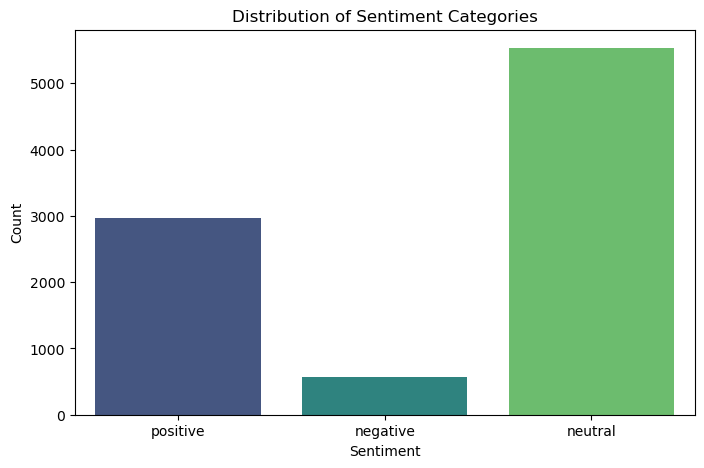

In [26]:
# Data visualization of target variable
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'sentiments', order = ['positive', 'negative', 'neutral'], palette = 'viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show();

Most tweets are labeled as neutral, followed by positive with negative tweets being the least frequent. Positive sentiment is more than negative sentiment meaning there is class imbalance.

Data Visualization for Tweet Lengths

In [27]:
# Text length analysis
df['tweet_length'] = df['cleaned_tweet'].str.len()
df['word_count'] = df['cleaned_tweet'].str.split().str.len()

# Summary of text statistics
print(f"Average tweet length: {df['tweet_length'].mean():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Longest tweet: {df['tweet_length'].max()} characters")
print(f"Shortest tweet: {df['tweet_length'].min()} characters")

Average tweet length: 67.80 characters
Average word count: 11.09 words
Longest tweet: 131 characters
Shortest tweet: 14 characters


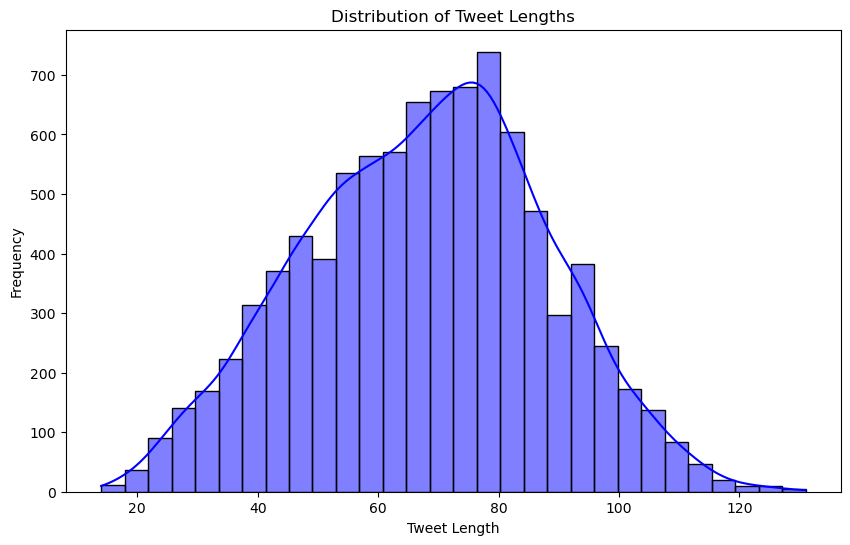

In [28]:
# Tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(df['tweet_length'], bins = 30, kde = True, color = 'blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show();


The distribution of tweets lengths is slightly right-skewed, indicating that most tweets are moderately short(between 60 - 100 characters)

This explains that twitter users often express opinions concisely but occasionally write longer posts when elaborating on product experiences.

Data Visualization for Brands

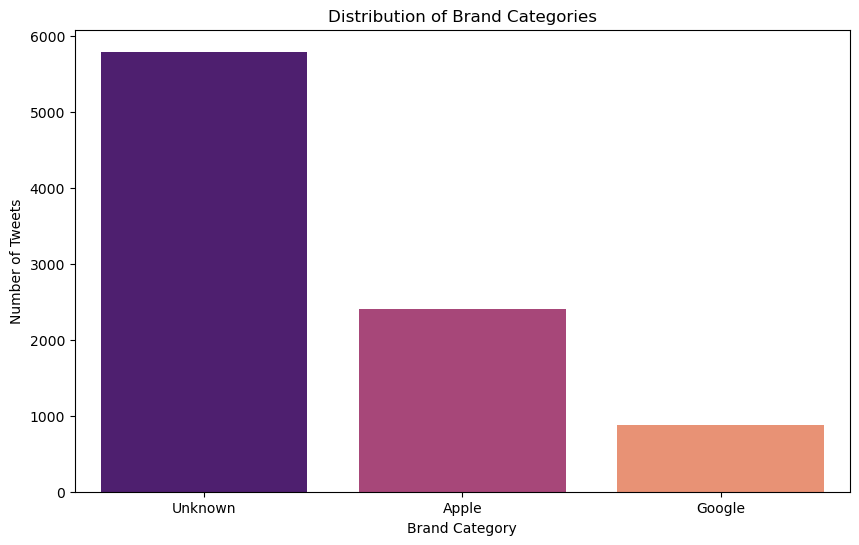

In [29]:
# Brand category distribution
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'brand_category', order = df['brand_category'].value_counts().index, palette = 'magma')
plt.title('Distribution of Brand Categories')
plt.xlabel('Brand Category')
plt.ylabel('Number of Tweets')
plt.show();

Apple is mentioned more frequently than Google.

**Bivariate Analysis**

Sentiments vs Brand category

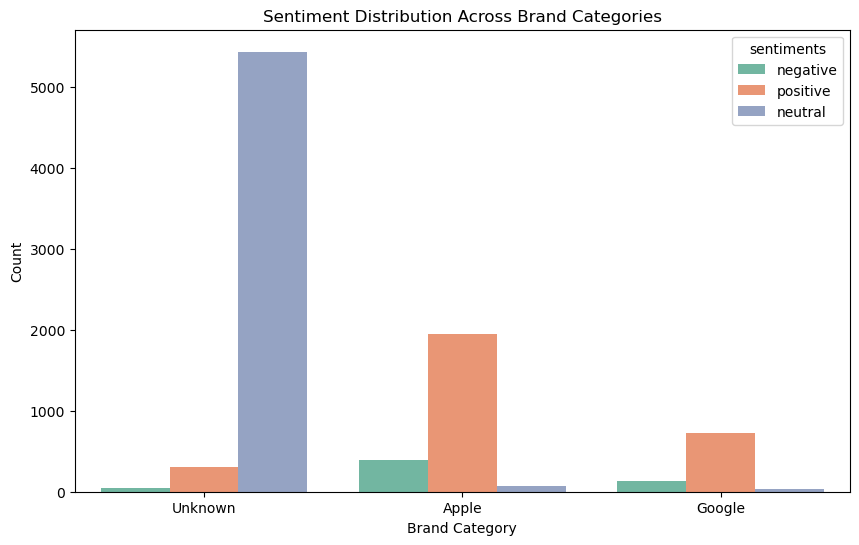

In [30]:
# Sentiment vs Brand Category
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'brand_category', hue = 'sentiments', order = df['brand_category'].value_counts().index, palette = 'Set2')
plt.title('Sentiment Distribution Across Brand Categories')
plt.xlabel('Brand Category')
plt.ylabel('Count')
plt.show()

Apple has a higher count of positive tweets compared to Google.

Tweet length vs Sentiment

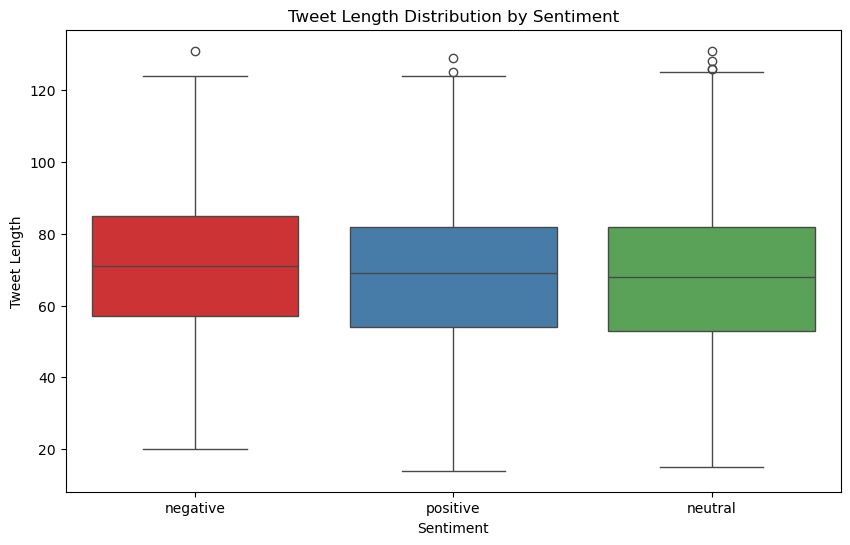

In [31]:
# Tweet length vs sentiment
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'sentiments', y = 'tweet_length', palette = 'Set1')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

The median tweet length is similar across sentiment categories.


Brand Category v Tweet length

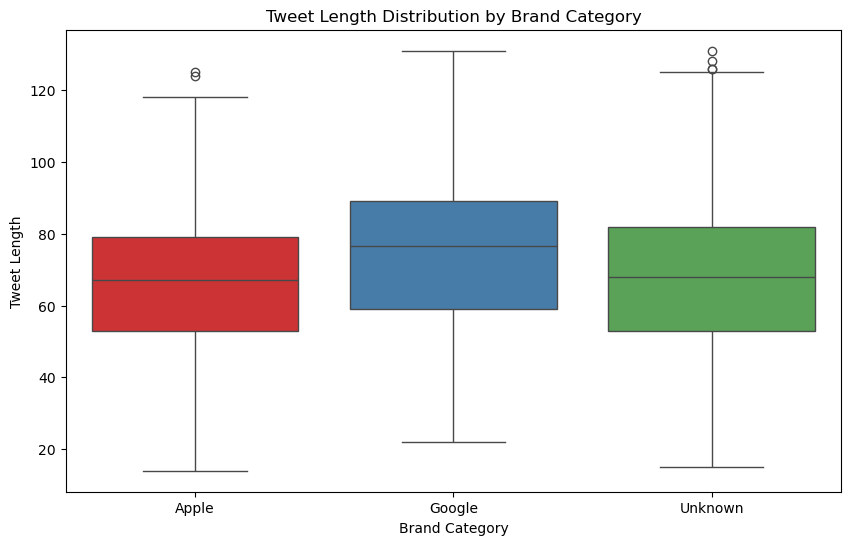

In [32]:
# Brand Category vs Tweet Length
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'brand_category', y = 'tweet_length', palette = 'Set1')
plt.title('Tweet Length Distribution by Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('Tweet Length')
plt.show()

Google tweets have a higher median tweet length compared to Apple.

**Multivariate Analysis**

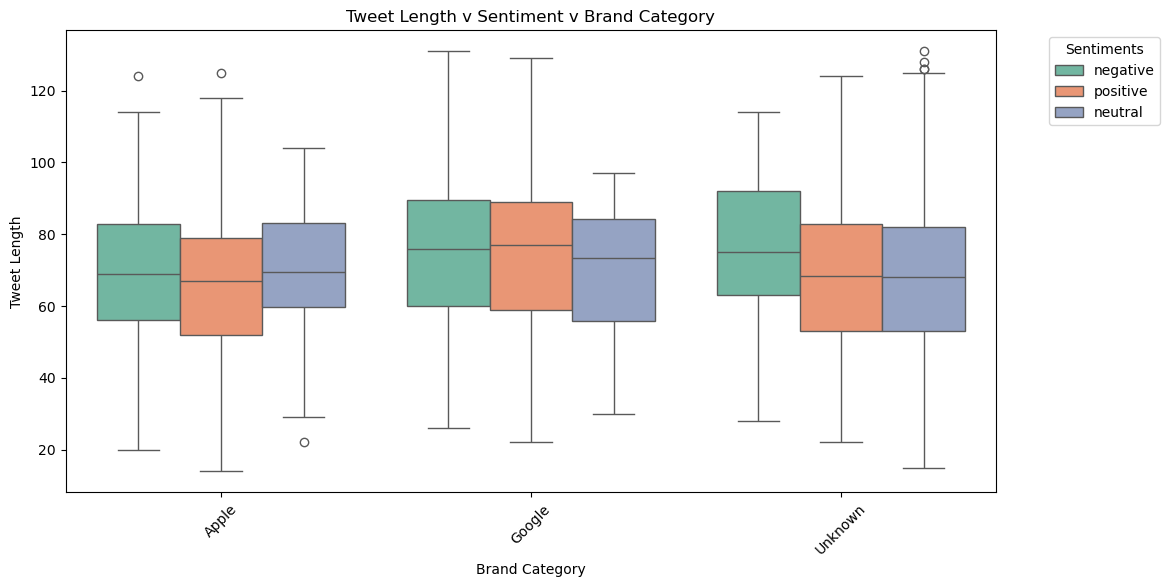

In [33]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'brand_category', y = 'tweet_length', hue = 'sentiments', palette = 'Set2')
plt.title('Tweet Length v Sentiment v Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('Tweet Length')
plt.legend(title = 'Sentiments', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.xticks(rotation = 45)
plt.show()


Positive tweets about Apple tend to be slightly longer than negative or neutral ones.
Google tweets show a similar pattern, but differences are minor.

### 3.5 Frequency Distribution
Now that we've done some basic cleaning and tokenization, let's go ahead and create a Frequency Distributionto see the number of times each word is used.

In [34]:
# Frequency distribution of most common words in the dataset
all_words = ' '.join(df['cleaned_tweet']).split()
freq_dist = FreqDist(all_words)
common_words = freq_dist.most_common(20)
common_words

[('sxsw', 9641),
 ('link', 4308),
 ('ipad', 3007),
 ('google', 2655),
 ('apple', 2341),
 ('quot', 1696),
 ('iphone', 1592),
 ('store', 1529),
 ('new', 1084),
 ('austin', 974),
 ('amp', 829),
 ('app', 826),
 ('circle', 685),
 ('launch', 684),
 ('social', 663),
 ('pop', 599),
 ('android', 598),
 ('today', 577),
 ('network', 468),
 ('get', 457)]

Some words like 'sxsw', 'mention', 'link', 'rt', 'amp', 'quot' do not add meaning to our text so we add them to our stopwords list.

In [35]:
# Add additional stopwords
additional_stopwords = ['sxsw', 'mention', 'link', 'rt', 'amp', 'quot']
stopwordlist.extend(additional_stopwords)

In [36]:
# Apply the function after updating the stopword list
df['final_tweet'] = df['cleaned_tweet'].apply(clean_text)

In [37]:
# Confirm the changes
df[['tweet_text', 'cleaned_tweet', 'final_tweet']].head()

,tweet_text,cleaned_tweet,final_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting rise austin dead need upg...,g iphone hr tweeting rise austin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipad iphone app likely appreciate...,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw,wait ipad also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival crashy year iphone app sxsw,hope year festival crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...,great stuff fri marissa mayer google tim reill...


In [38]:
# Combining
all_words = ' '.join(df['final_tweet']).split()
all_words_freqdist = FreqDist(all_words)
all_words_freqdist.most_common(20)

[('ipad', 3007),
 ('google', 2655),
 ('apple', 2341),
 ('iphone', 1592),
 ('store', 1529),
 ('new', 1084),
 ('austin', 974),
 ('app', 826),
 ('circle', 685),
 ('launch', 684),
 ('social', 663),
 ('pop', 599),
 ('android', 598),
 ('today', 577),
 ('network', 468),
 ('get', 457),
 ('line', 450),
 ('via', 436),
 ('party', 401),
 ('free', 390)]